In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [3]:
df=pd.read_csv("/content/drive/My Drive/BAT_Assignment_Data/german_credit.csv")
df.head(10)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
df.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [6]:
print(df['Creditability'].value_counts(normalize=True))
print(df['Creditability'].value_counts(normalize=False))

1    0.7
0    0.3
Name: Creditability, dtype: float64
1    700
0    300
Name: Creditability, dtype: int64


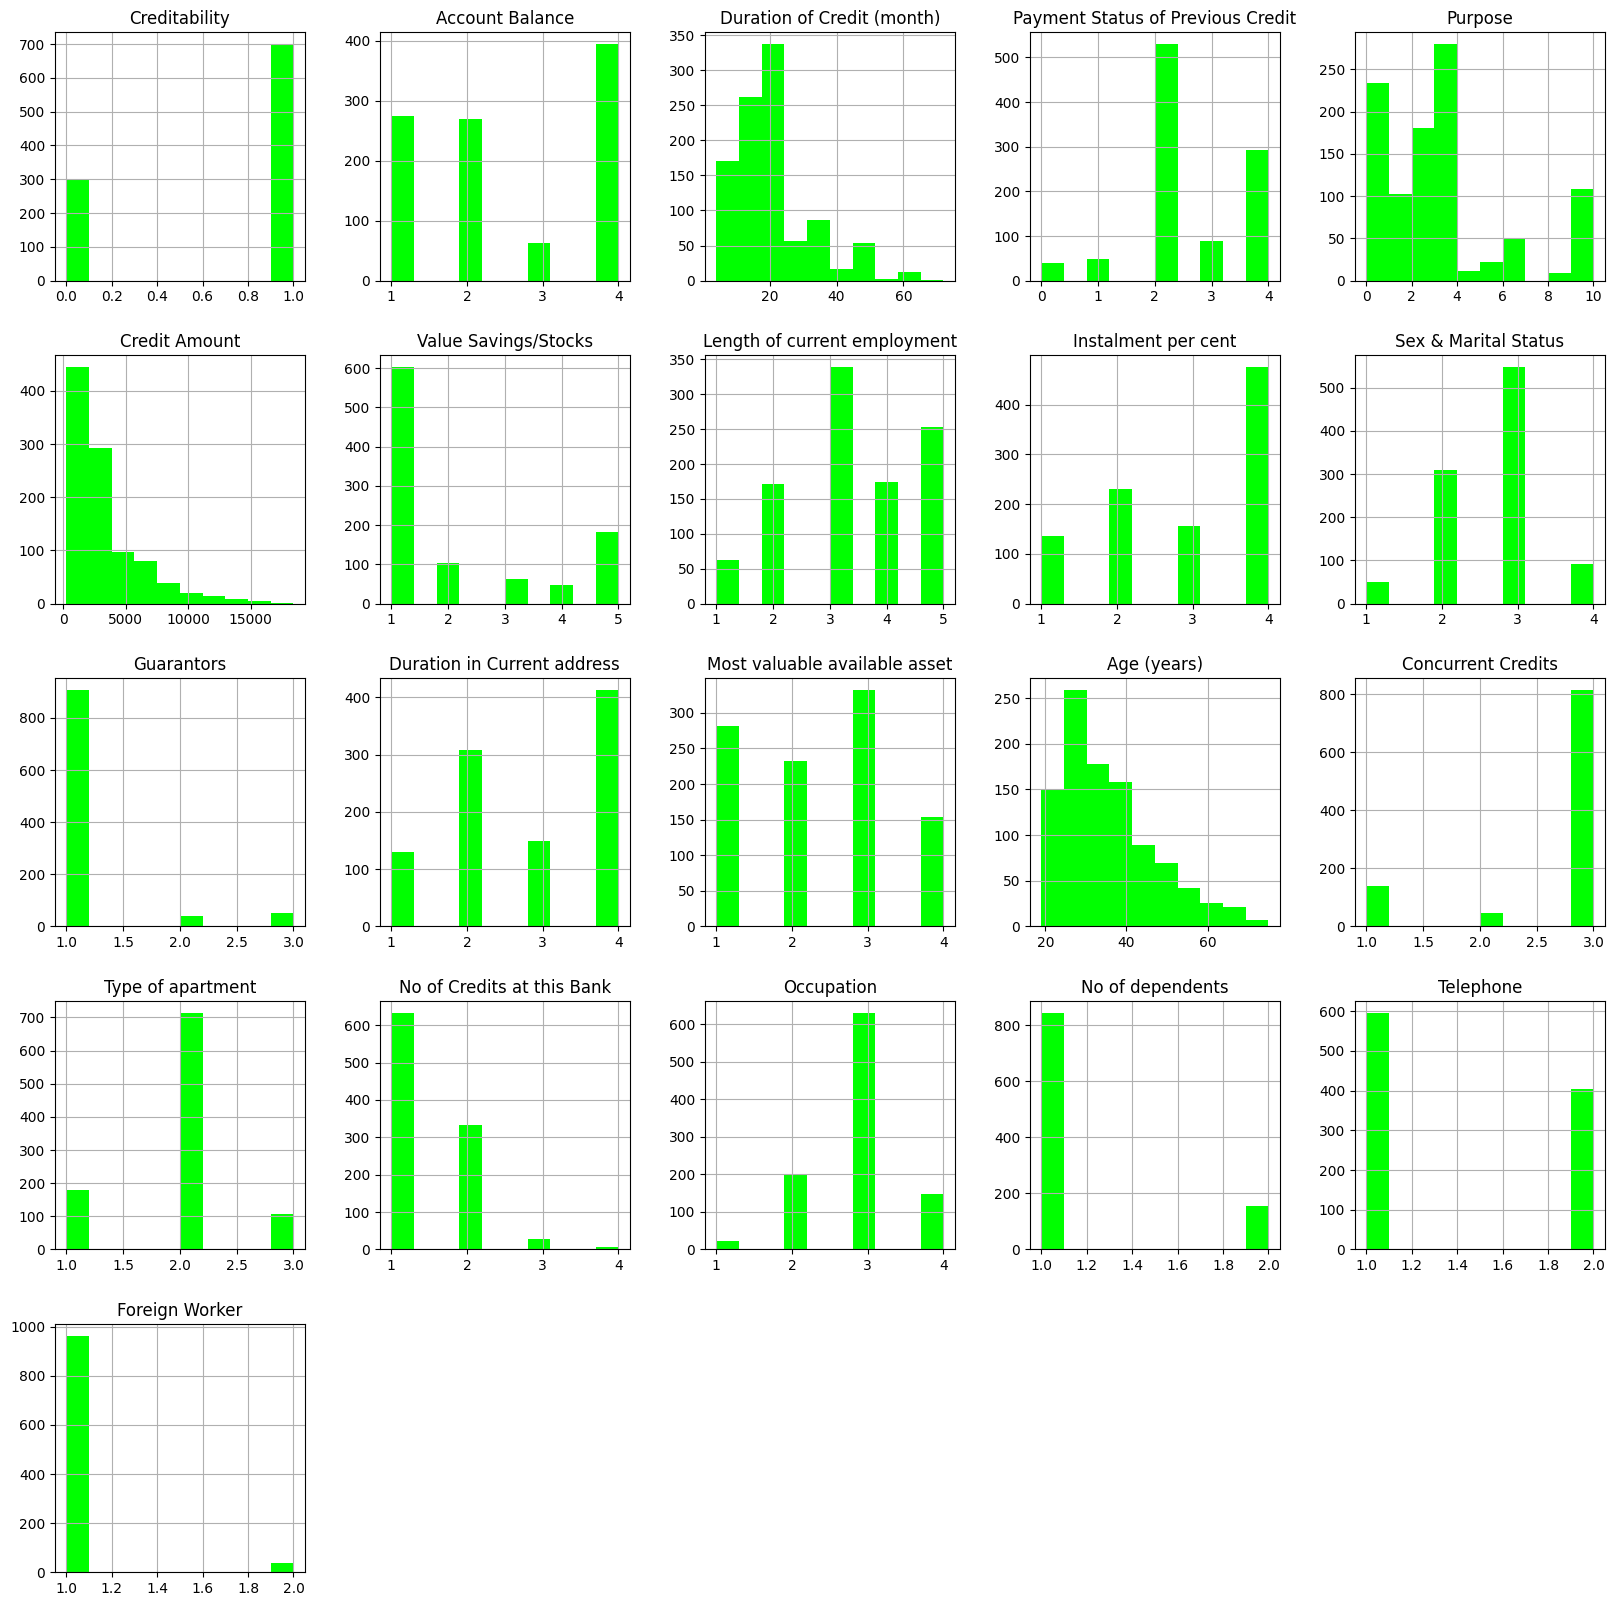

In [7]:
df.hist(figsize = (20, 20), histtype ='bar', color = 'lime')
plt.show()

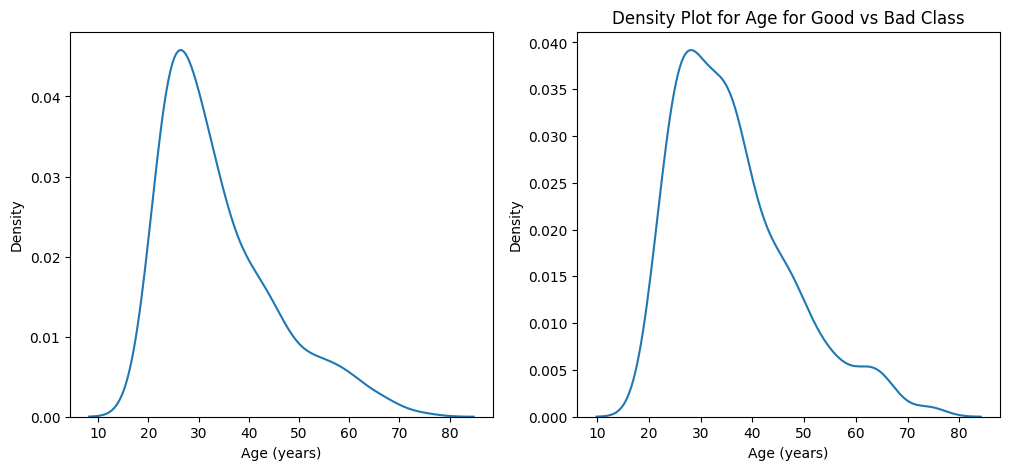

In [11]:
df_0 = df[df['Creditability'] == 0] #bad
df_1 = df[df['Creditability'] == 1] #good

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
plt.title('Density Plot for Age for Bad vs Good Class')
sns.kdeplot(ax=ax1, x="Age (years)", data=df_0)
sns.kdeplot(ax=ax2, x="Age (years)", data=df_1)
plt.show();

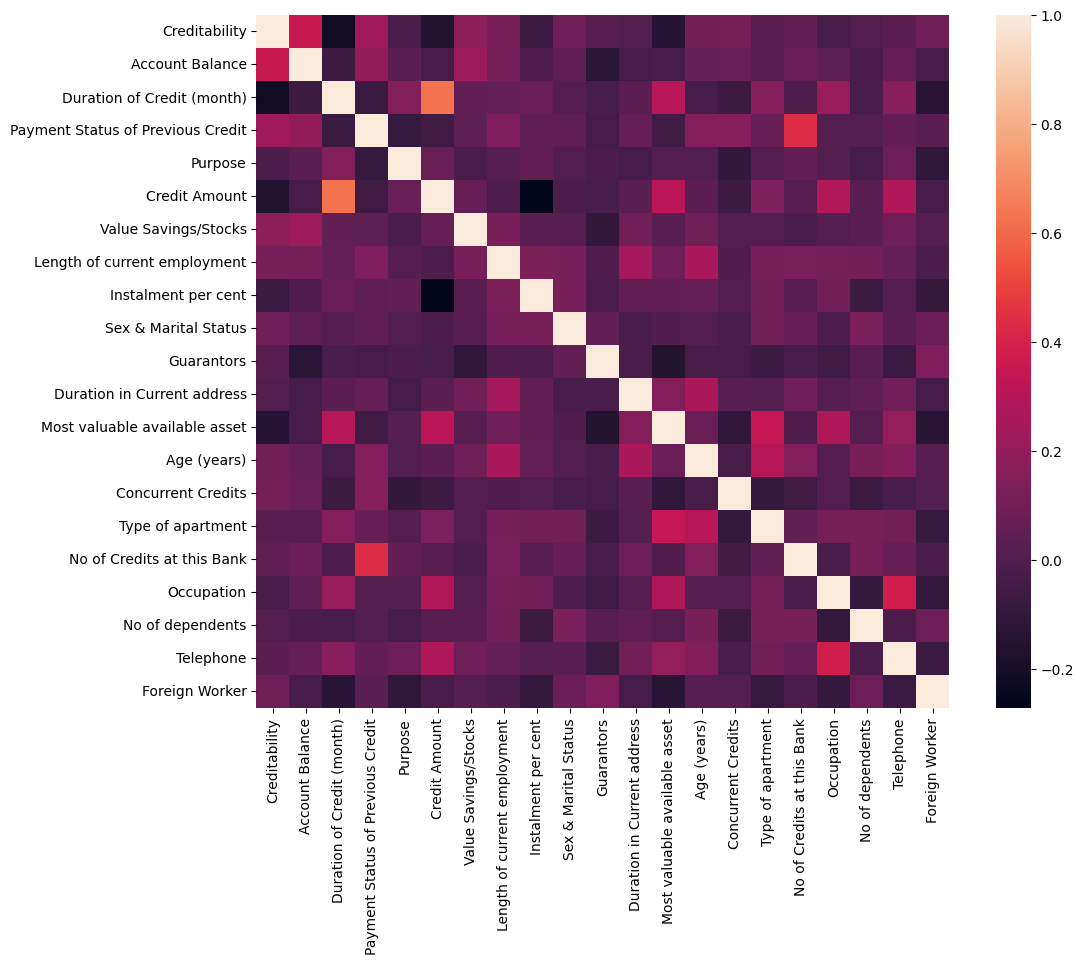

' there is no notable correlation between features V1-V28. There are certain correlations between some of these features and \n    Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).'

In [9]:
# Correlation matrix
fig = plt.figure(figsize = (12, 9))
sns.heatmap(df.corr(), square = True)
plt.show()

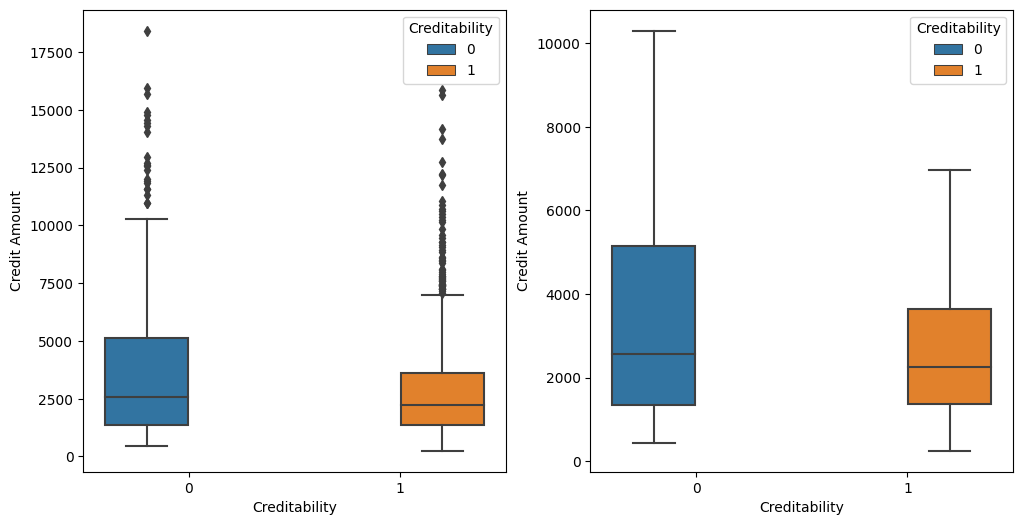

' The credible people have a larger mean value, larger Q1, Q3 and Q4 and larger outliers; \n    bad credibility have a smaller Q1, mean, Q4 and smaller outliers. '

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax=ax1, x="Creditability", y="Credit Amount", hue="Creditability", data=df, showfliers=True)
s = sns.boxplot(ax=ax2, x="Creditability", y="Credit Amount", hue="Creditability", data=df, showfliers=False)
plt.show();
''' The credible people have a larger mean value, larger Q1, Q3 and Q4 and larger outliers; 
    bad credibility have a smaller Q1, mean, Q4 and smaller outliers. '''

In [15]:
X = df.drop(columns='Creditability', axis=1).values
Y = df['Creditability'].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import time

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
algos = []
roc_score = []
time_taken = []
accuracy = []

In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
start = time.time()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print(roc_auc_score(y_test, pred))
algos.append("K-Nearest Neighbors")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

Accuracy Score :  0.655
[[ 14  48]
 [ 21 117]]
              precision    recall  f1-score   support

           0       0.40      0.23      0.29        62
           1       0.71      0.85      0.77       138

    accuracy                           0.66       200
   macro avg       0.55      0.54      0.53       200
weighted avg       0.61      0.66      0.62       200

0.5368162692847125


Accuracy Score :  0.715
[[ 37  25]
 [ 32 106]]
              precision    recall  f1-score   support

           0       0.54      0.60      0.56        62
           1       0.81      0.77      0.79       138

    accuracy                           0.71       200
   macro avg       0.67      0.68      0.68       200
weighted avg       0.72      0.71      0.72       200

0.6824450677886863


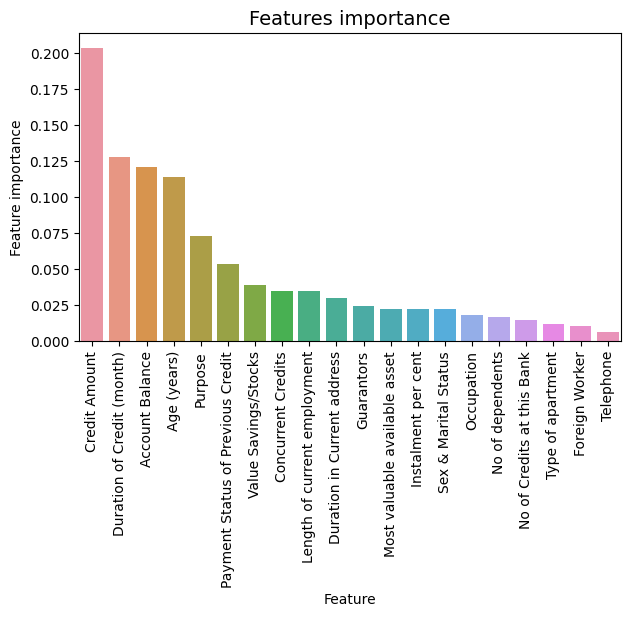

In [22]:
# Decision Tree
dt = DecisionTreeClassifier()
start = time.time()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print(roc_auc_score(y_test, pred))
algos.append("Decision Tree Classifier")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Creditability', axis=1).columns, 'Feature importance': dt.feature_importances_})
tmp.sort_values(by='Feature importance',ascending=False, inplace=True)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

Accuracy Score :  0.755
[[ 28  34]
 [ 15 123]]
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        62
           1       0.78      0.89      0.83       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

ROC AUC Score :  0.6714586255259467


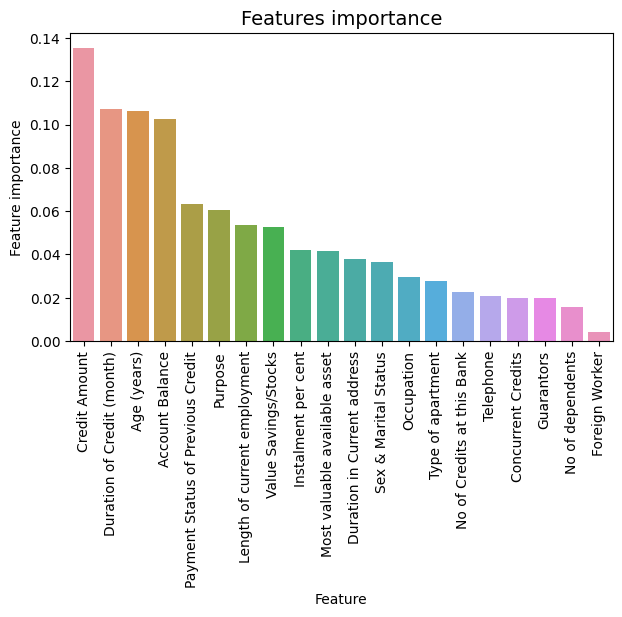

In [23]:
# Random Forest Classifier 
rf = RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Random Forest Classifier")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Creditability', axis=1).columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [24]:
# Logistic Regression
lr = LogisticRegression(solver="liblinear", random_state=0)
start = time.time()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Logistic Regression")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

Accuracy Score :  0.735
[[ 22  40]
 [ 13 125]]
              precision    recall  f1-score   support

           0       0.63      0.35      0.45        62
           1       0.76      0.91      0.83       138

    accuracy                           0.73       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.72      0.73      0.71       200

ROC AUC Score :  0.6303179055633474


Accuracy Score :  0.735
[[ 27  35]
 [ 18 120]]
              precision    recall  f1-score   support

           0       0.60      0.44      0.50        62
           1       0.77      0.87      0.82       138

    accuracy                           0.73       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.72      0.73      0.72       200

ROC AUC Score :  0.6525245441795231


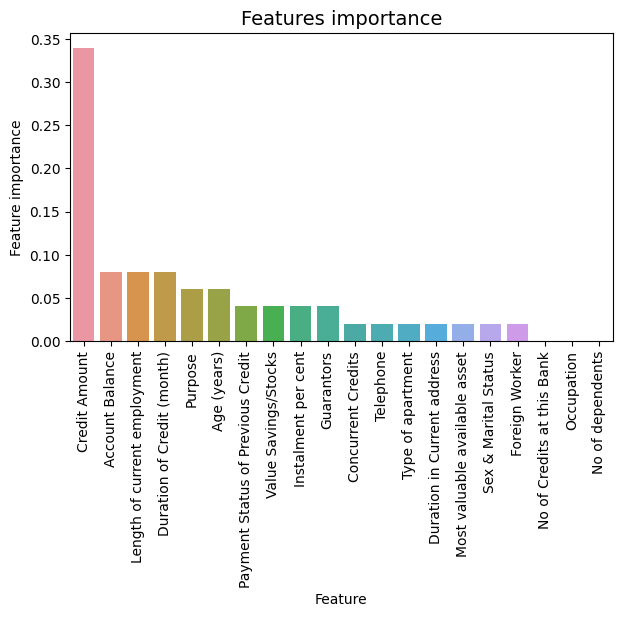

In [25]:
# AdaBoost Classifer
ab = AdaBoostClassifier()
start = time.time()
ab.fit(x_train, y_train)
pred = ab.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Adaptive Boosting Classifier")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Creditability', axis=1).columns, 'Feature importance': ab.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

Accuracy Score :  0.725
[[ 31  31]
 [ 24 114]]
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        62
           1       0.79      0.83      0.81       138

    accuracy                           0.73       200
   macro avg       0.67      0.66      0.67       200
weighted avg       0.72      0.72      0.72       200

ROC AUC Score :  0.6630434782608696


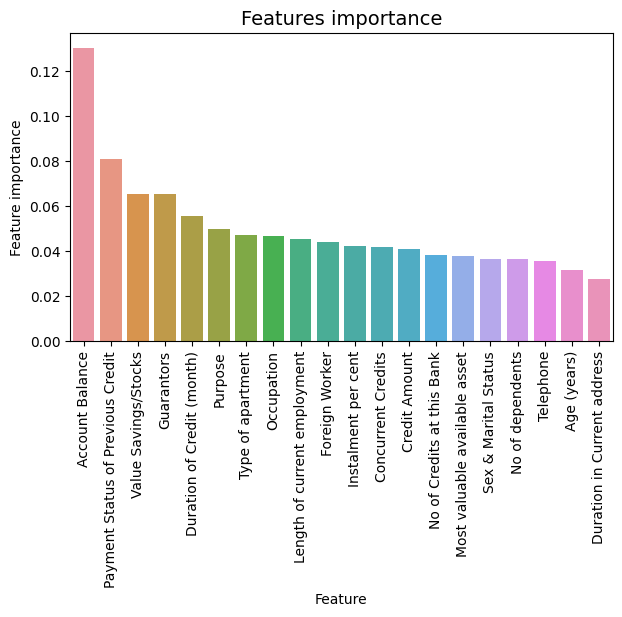

In [26]:
# Extreme Gradient Boosting
rf = XGBClassifier()
start = time.time()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
end = time.time()

# accuracy score
print("Accuracy Score : ", accuracy_score(y_test, pred))

# confusion matrix
print(confusion_matrix(y_test, pred))

# classification report
print(classification_report(y_test, pred))

# roc_auc_score 
print("ROC AUC Score : ", roc_auc_score(y_test, pred))
algos.append("Extreme Gradient Boosting")
roc_score.append(roc_auc_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
time_taken.append(end-start)

# features importance
tmp = pd.DataFrame({'Feature': df.drop(columns='Creditability', axis=1).columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [27]:
final = pd.DataFrame({'MODEL' : algos, 'ROC AUC SCORE' : roc_score, 'ACCURACY' : accuracy, 'TIME TAKEN' : time_taken})
roc = final.sort_values('ROC AUC SCORE', ascending=False)
time = final.sort_values('TIME TAKEN', ascending=False)
acc = final.sort_values('ACCURACY', ascending=False)

In [28]:
time

,MODEL,ROC AUC SCORE,ACCURACY,TIME TAKEN
2,Random Forest Classifier,0.675900,0.755,0.246962
5,Random Forest Classifier,0.671459,0.755,0.245268
7,Adaptive Boosting Classifier,0.652525,0.735,0.241333
8,Extreme Gradient Boosting,0.663043,0.725,0.170125
3,Adaptive Boosting Classifier,0.652525,0.735,0.133040
4,Decision Tree Classifier,0.682445,0.715,0.034382
0,K-Nearest Neighbors,0.536816,0.655,0.024158
6,Logistic Regression,0.630318,0.735,0.014586
1,Decision Tree Classifier,0.707457,0.725,0.010448


In [29]:
roc

,MODEL,ROC AUC SCORE,ACCURACY,TIME TAKEN
1,Decision Tree Classifier,0.707457,0.725,0.010448
4,Decision Tree Classifier,0.682445,0.715,0.034382
2,Random Forest Classifier,0.675900,0.755,0.246962
5,Random Forest Classifier,0.671459,0.755,0.245268
8,Extreme Gradient Boosting,0.663043,0.725,0.170125
3,Adaptive Boosting Classifier,0.652525,0.735,0.133040
7,Adaptive Boosting Classifier,0.652525,0.735,0.241333
6,Logistic Regression,0.630318,0.735,0.014586
0,K-Nearest Neighbors,0.536816,0.655,0.024158


In [30]:
acc

,MODEL,ROC AUC SCORE,ACCURACY,TIME TAKEN
2,Random Forest Classifier,0.675900,0.755,0.246962
5,Random Forest Classifier,0.671459,0.755,0.245268
3,Adaptive Boosting Classifier,0.652525,0.735,0.133040
6,Logistic Regression,0.630318,0.735,0.014586
7,Adaptive Boosting Classifier,0.652525,0.735,0.241333
1,Decision Tree Classifier,0.707457,0.725,0.010448
8,Extreme Gradient Boosting,0.663043,0.725,0.170125
4,Decision Tree Classifier,0.682445,0.715,0.034382
0,K-Nearest Neighbors,0.536816,0.655,0.024158
